# UMAPs Neurips samples, NK cells

In this notebook different markers to identify NK cell subpopulations are tested. Markers are collected from Melsen et al., paper (2022). RNA and corresponding surface markers are shown when available. Protein expression levels within a cell are normalized using the DSB transformation. UMAPs are generated from latent space coordinates. 

Reference: 
Melsen, J. E., van Ostaijen-Ten Dam, M. M., Schoorl, D. J. A., Schol, P. J., van den Homberg, D. A. L., Lankester, A. C., Lugthart, G., & Schilham, M. W. (2022). Single-cell transcriptomics in bone marrow delineates CD56dimGranzymeK+ subset as intermediate stage in NK cell differentiation. Frontiers in immunology, 13, 1044398. https://doi.org/10.3389/fimmu.2022.1044398

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [17]:
#Add here new "outer-file" with more genes

#Easigenomics dataset

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_easi_norm.h5ad')

In [18]:
adata.obs['batch_group'] 

AAACCTGAGCCCTAAT-1-100    Easi
AAACCTGCAAGCCGCT-1-100    Easi
AAACCTGCACTGTCGG-1-100    Easi
AAACCTGCAGACGCTC-1-100    Easi
AAACCTGTCCTTAATC-1-100    Easi
                          ... 
TTTGTCAGTACATCCA-1-158    Easi
TTTGTCAGTAGGCATG-1-158    Easi
TTTGTCAGTATGCTTG-1-158    Easi
TTTGTCATCAAACCAC-1-158    Easi
TTTGTCATCCATGAAC-1-158    Easi
Name: batch_group, Length: 121340, dtype: category
Categories (1, object): ['Easi']

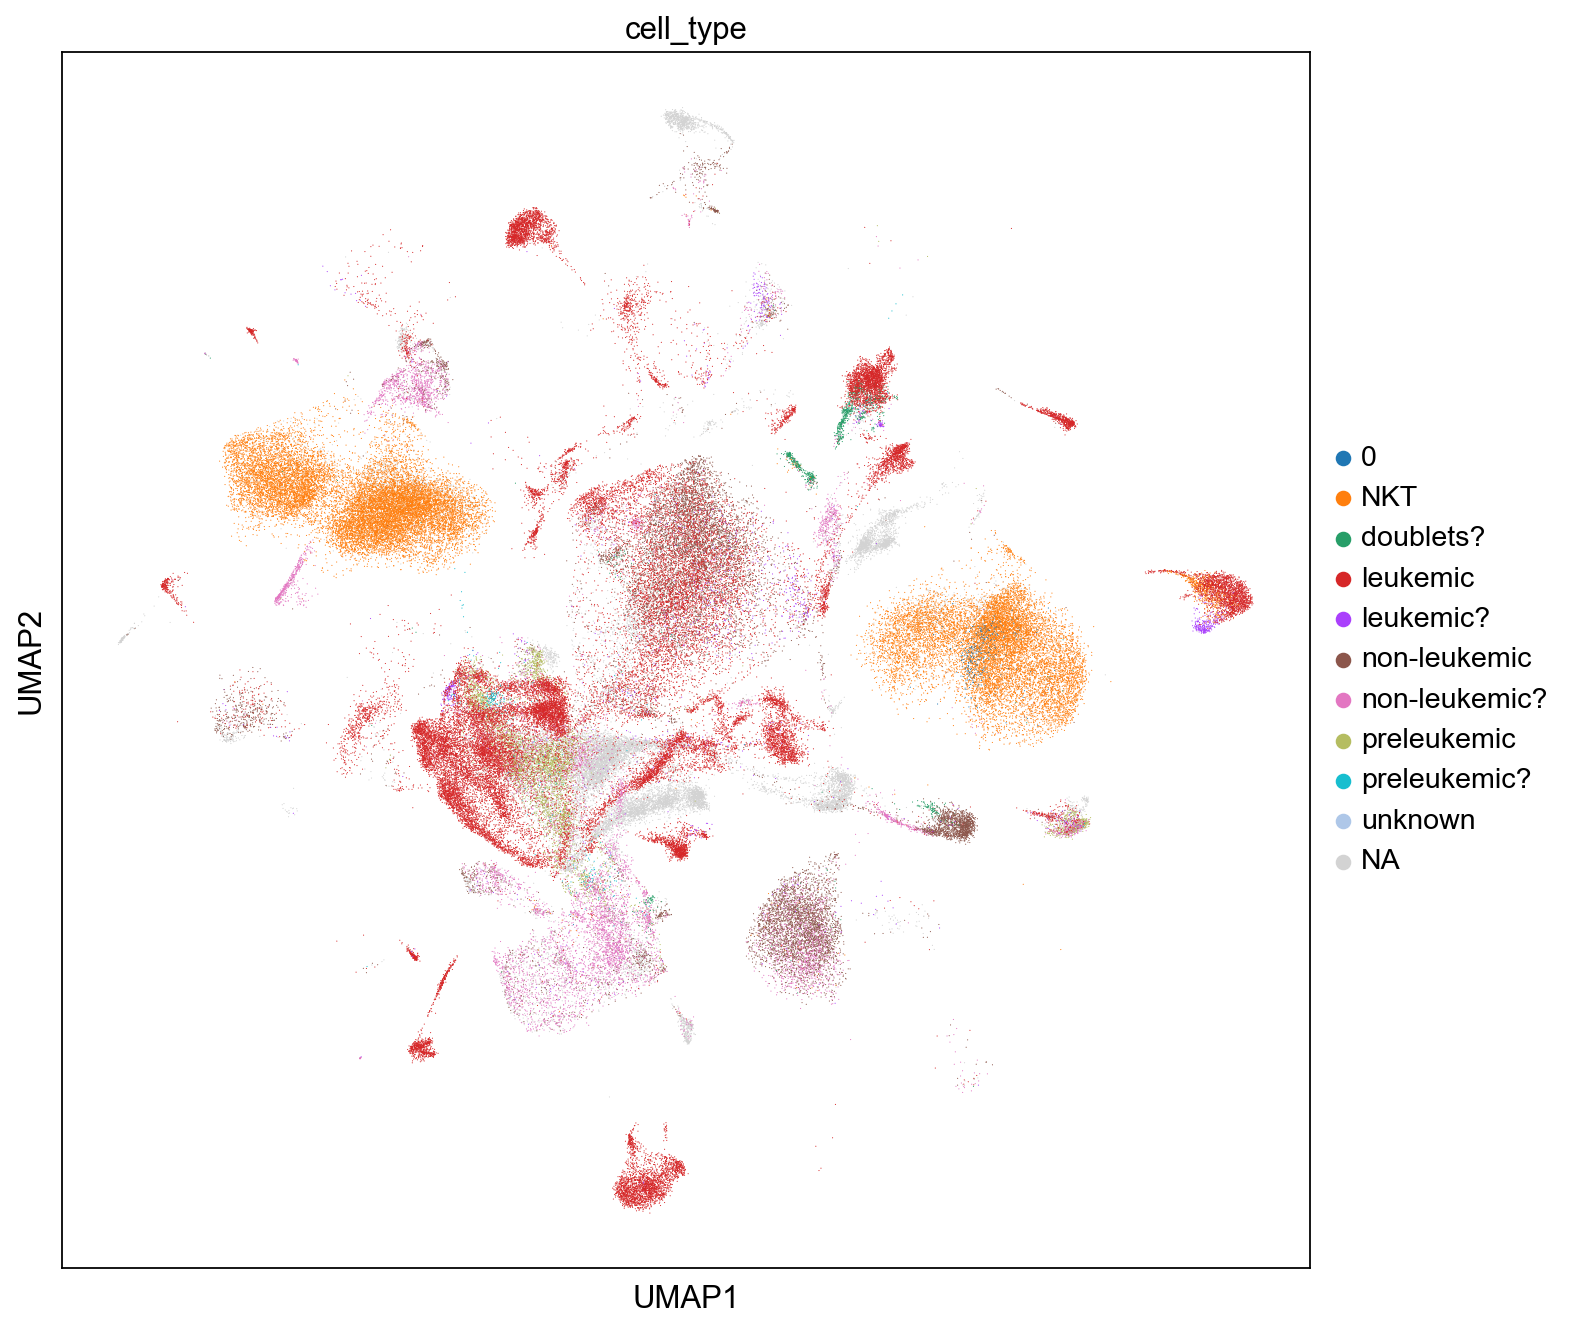

In [19]:
#latent space?

sc.pl.umap(adata, color = ['cell_type'], color_map = 'viridis')

In [6]:
adata.obs['cell_type'].unique().tolist()

['NKT',
 'non-leukemic',
 'preleukemic',
 'non-leukemic?',
 nan,
 'leukemic',
 'leukemic?',
 'doublets?',
 'unknown',
 '0',
 'preleukemic?']

In [20]:
#surface protein expression 
prot=adata.obsm['protein_expression_dsb']

In [21]:
#some proteins and genes have same names, here _prot added after protein names
prot=prot.rename(columns={'CD38': 'CD38_prot', 'CD34': 'CD34_prot'})

In [22]:
#adding protein information to obs

a = adata.obs
b = prot

adata1=pd.concat([a, b], axis=1)
adata.obs=adata1

In [23]:
adata

AnnData object with n_obs × n_vars = 121340 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34_prot'
    uns: 'neighbors', 'new_cell_type_colors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [53]:
#To find gene names

#result = [i for i in adata_neurips.var_names if i.startswith('TC')]
#print(result)

['TC2N', 'TCAF1', 'TCAF2', 'TCAIM', 'TCAP', 'TCEA1', 'TCEA2', 'TCEA3', 'TCEAL1', 'TCEAL2', 'TCEAL3', 'TCEAL4', 'TCEAL5', 'TCEAL7', 'TCEAL8', 'TCEAL9', 'TCEANC', 'TCEANC2', 'TCEB1', 'TCEB2', 'TCEB3', 'TCEB3-AS1', 'TCERG1', 'TCF12', 'TCF15', 'TCF19', 'TCF20', 'TCF23', 'TCF25', 'TCF3', 'TCF4', 'TCF4-AS2', 'TCF7', 'TCF7L1', 'TCF7L2', 'TCFL5', 'TCHH', 'TCHP', 'TCIRG1', 'TCL1A', 'TCL1B', 'TCL6', 'TCN2', 'TCOF1', 'TCP1', 'TCP10L', 'TCP11', 'TCP11L1', 'TCP11L2', 'TCTA', 'TCTE1', 'TCTE3', 'TCTEX1D1', 'TCTEX1D2', 'TCTEX1D4', 'TCTN1', 'TCTN2', 'TCTN3']


In [24]:
#selecting one sample, all cell types 

eg=adata[adata.obs['POOL'] == "EG35"]


In [25]:
eg

View of AnnData object with n_obs × n_vars = 2188 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34_prot'
    uns: 'neighbors', 'new_cell_type_colors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [28]:
sc.pp.neighbors(eg, use_rep="X_totalVI")

sc.tl.umap(eg)

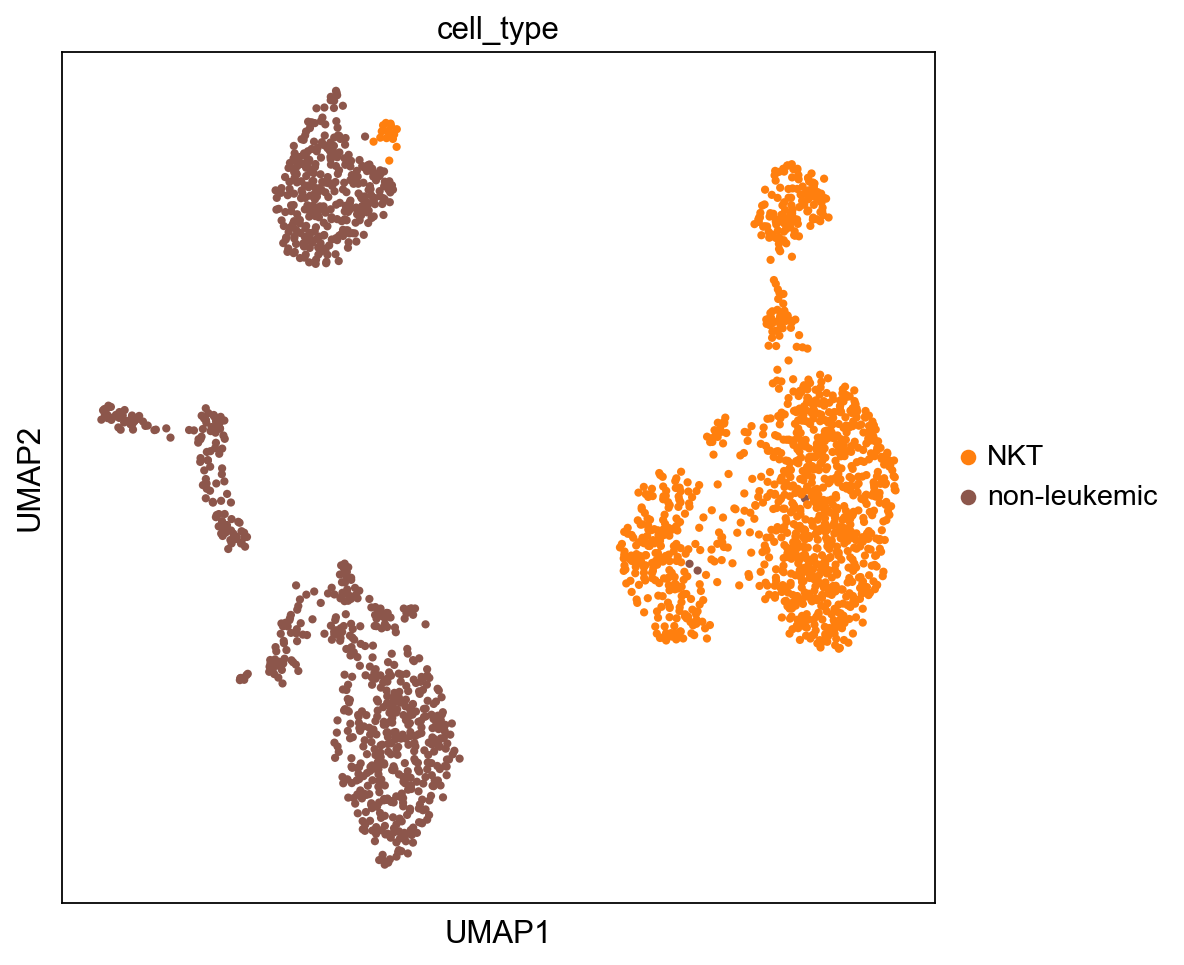

In [36]:
#Only selected sample, all cell types

sc.set_figure_params(figsize=(7, 7))


sc.pl.umap(eg, color = ['cell_type'], color_map = 'viridis')

In [32]:
sc.tl.leiden(eg, resolution = 1, key_added = "leiden_1")

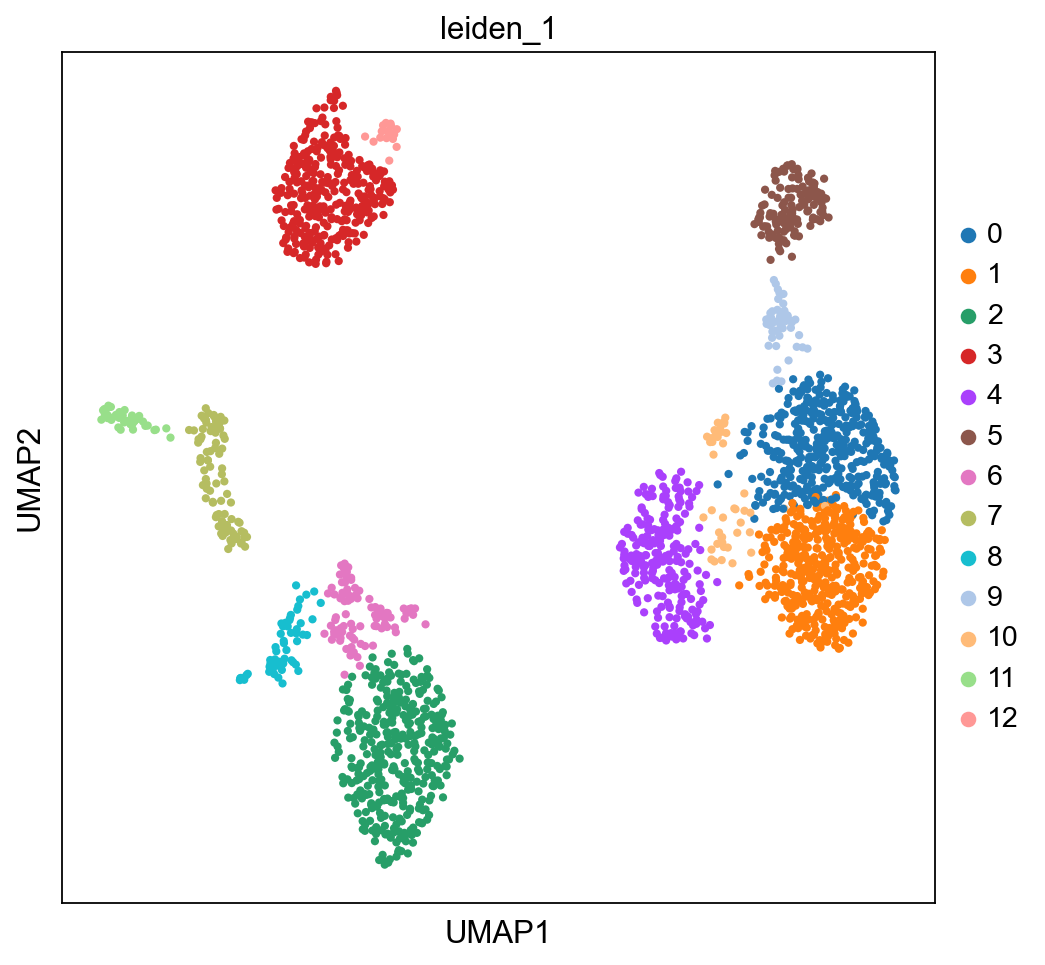

In [34]:
sc.pl.umap(eg, color=['leiden_1'], ncols =3)

In [84]:
eg

AnnData object with n_obs × n_vars = 2188 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_1'
    uns: 'neighbors', 'new_cell_type_colors', 'umap', 'cell_type_colors', 'leiden', 'leiden_1_colors', 'leiden_r2_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distan

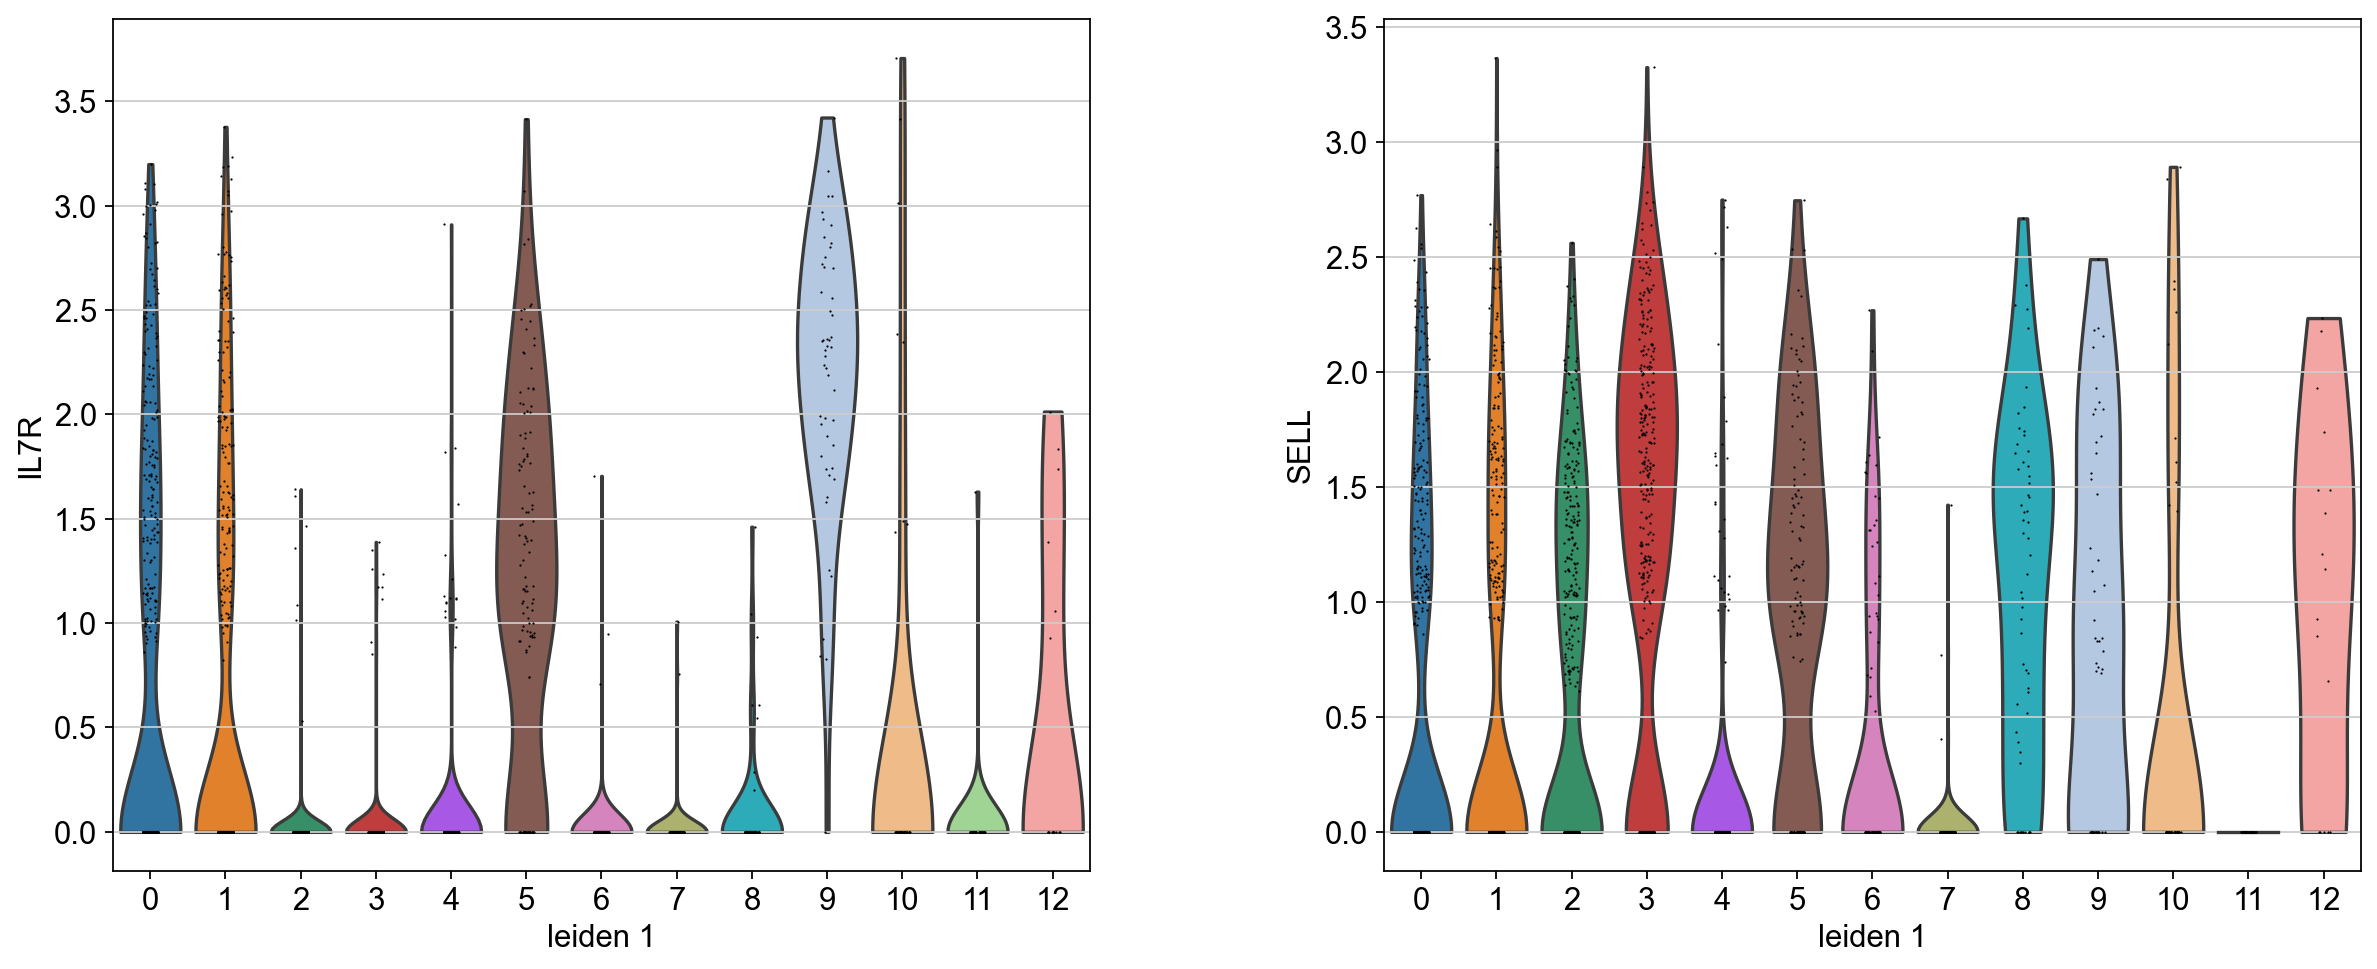

In [85]:
sc.pl.violin(eg, ['IL7R', 'SELL'], groupby='leiden_1')

In [37]:
#Markers received from HRUH

nk_genes = ["FGFBP2", "FCGR3A", "S1PR5", "KLRC1", "KLRC2", "KLRC3", "KLRD1", "GNLY","GZMB", "CX3CR1", "GPR56", "PRF1", "KLRB1", "SPON2", "NKG7", "TTC38", "FCRL6", "LILRB1","PLAC8", "MBP"]

nk_genes2 = ["KLRC1","NCAM1","GZMK","GZMA","KLRB1","KLRC2","GZMH","LAG3","B2M","HLA-DRA","OAS3","MX1","IRF7","MX2","IRF9","OAS1","OAS2", "EIF2AK2", "TNFRSF18", "TNFRSF9",  "TNFRSF4",  "CRTAM", "ENTPD1",  "HAVCR2",  "TIGIT", "TNFSF10", "BCL2L11", "CCL3", "CCL4", "TNF", "IFNG", "CD69"]

In [42]:
#Used to check which genes were measured

listOfmarkers= nk_genes
markers = []

for x in listOfmarkers:
    if x in adata.var_names:
        print(x)
        markers.append(x)
        



GZMB
SPON2
NKG7
PLAC8
MBP


In [46]:
#Used to check which genes were measured

listOfmarkers= nk_genes2
markers2 = []

for x in listOfmarkers:
    if x in adata.var_names:
        print(x)
        markers2.append(x)




B2M
HLA-DRA
OAS3
MX1
IRF7
MX2
IRF9
OAS2
EIF2AK2
TNFSF10
BCL2L11
CCL3


In [49]:
nk_markers = [markers, markers2]

nk_markers = list(np.concatenate(nk_markers).flat)

nk_markers

['GZMB',
 'SPON2',
 'NKG7',
 'PLAC8',
 'MBP',
 'B2M',
 'HLA-DRA',
 'OAS3',
 'MX1',
 'IRF7',
 'MX2',
 'IRF9',
 'OAS2',
 'EIF2AK2',
 'TNFSF10',
 'BCL2L11',
 'CCL3']

In [51]:
eg

AnnData object with n_obs × n_vars = 2188 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_1'
    uns: 'neighbors', 'new_cell_type_colors', 'umap', 'cell_type_colors', 'leiden', 'leiden_1_colors', 'leiden_r2_colors'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

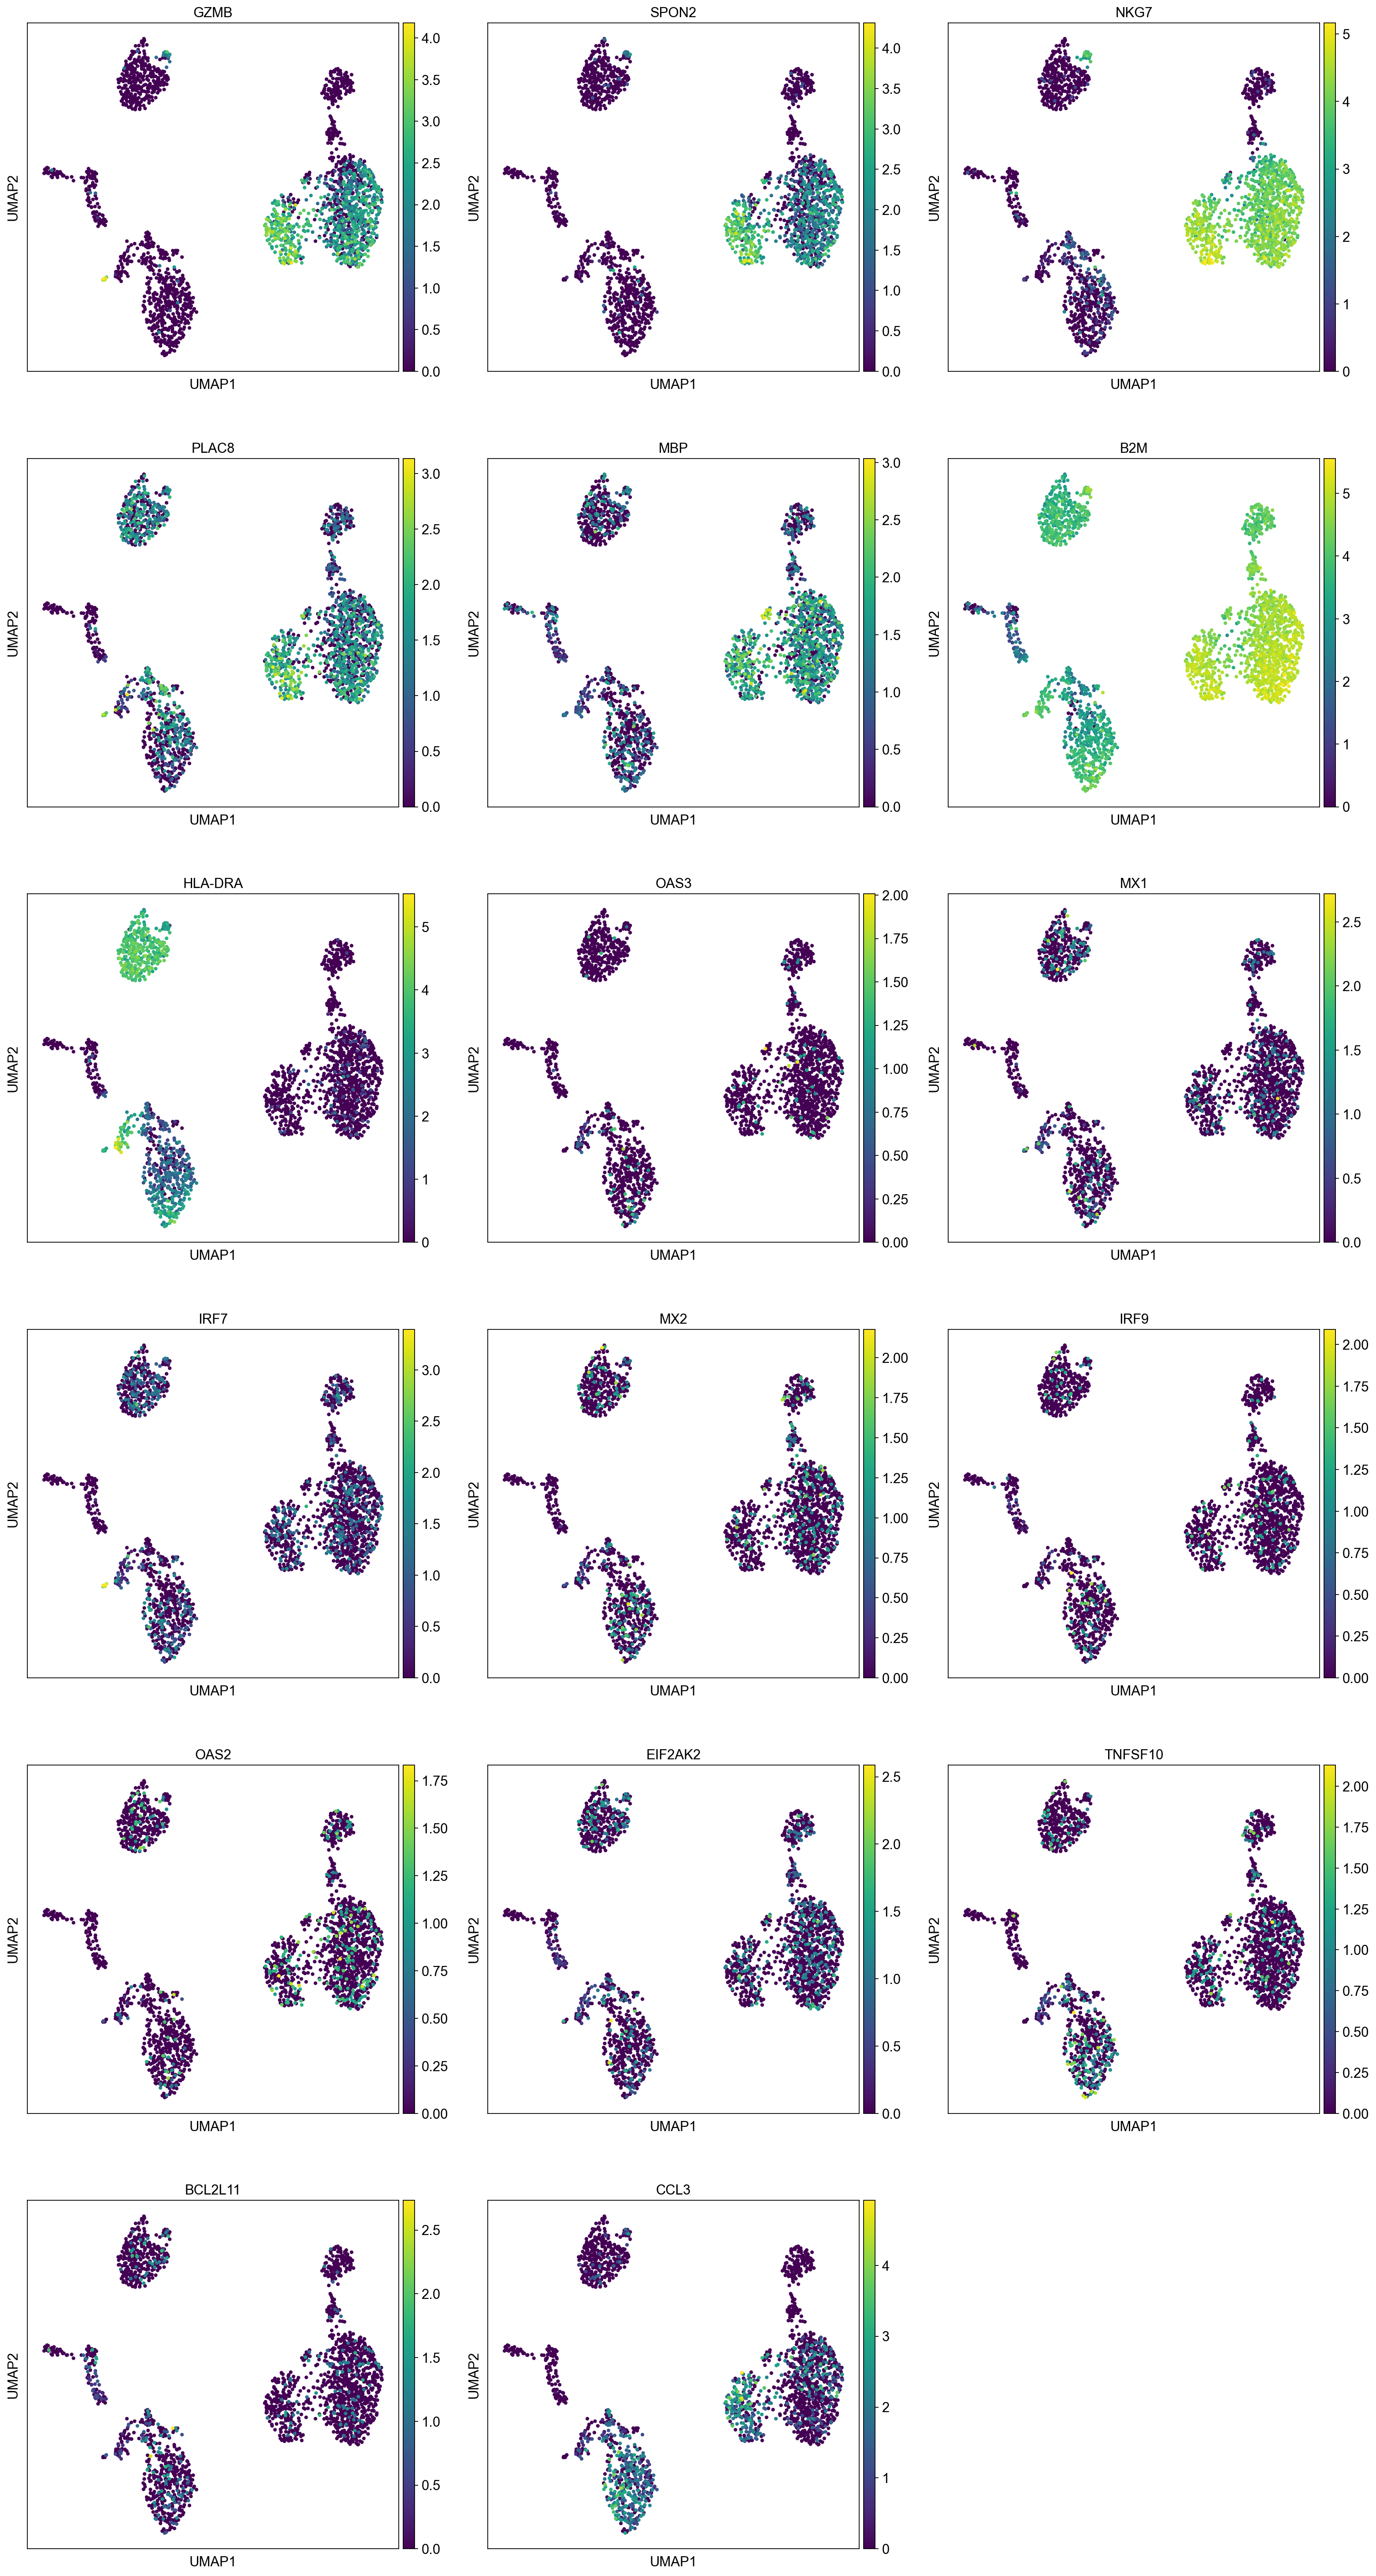

In [50]:
sc.pl.umap(eg, color=nk_markers, ncols =3)

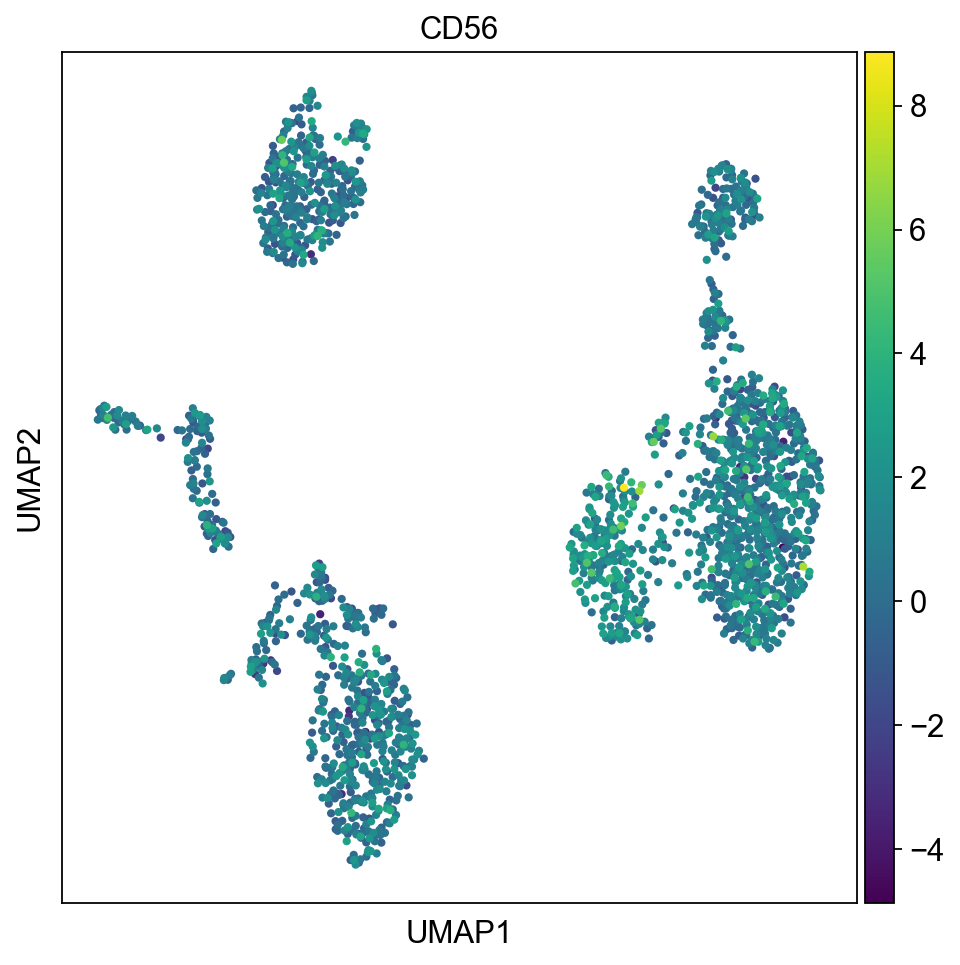

In [52]:
nk_prot = ['CD56']

sc.pl.umap(eg, color=nk_prot, ncols =3)

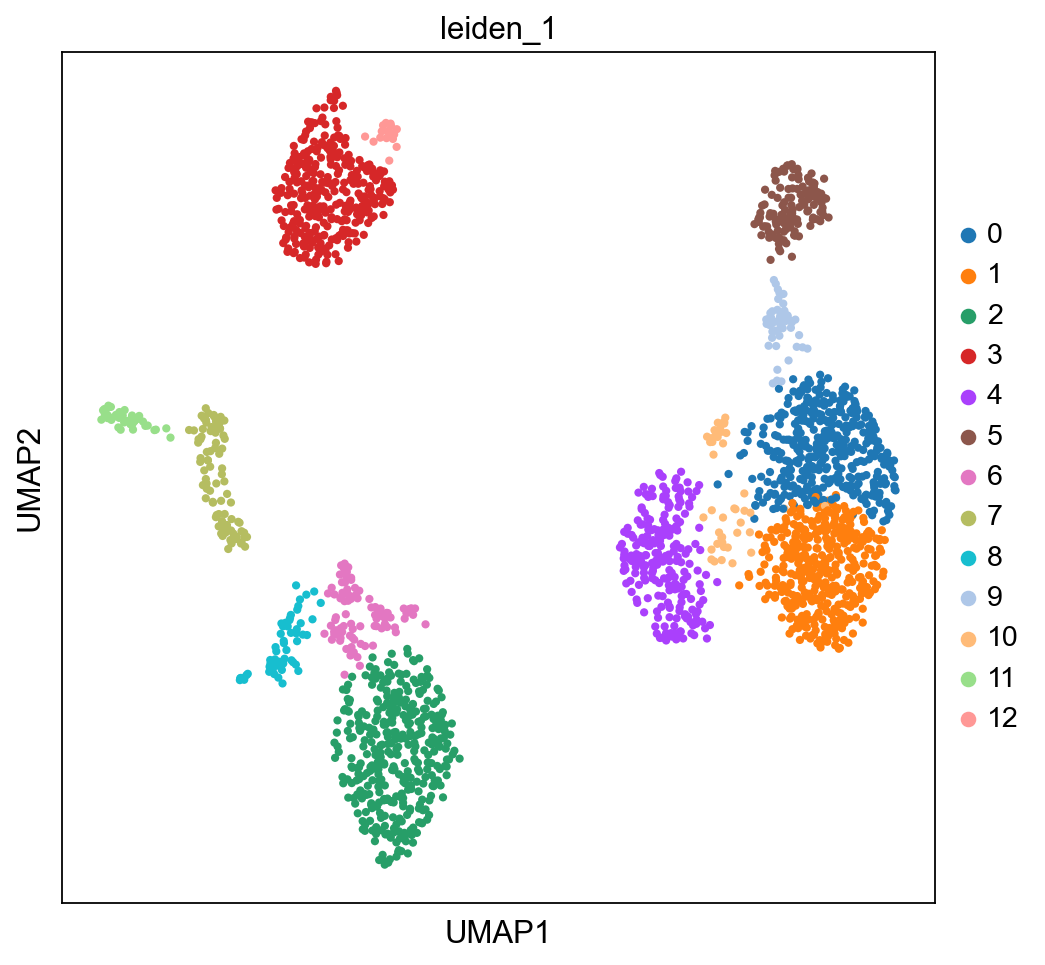

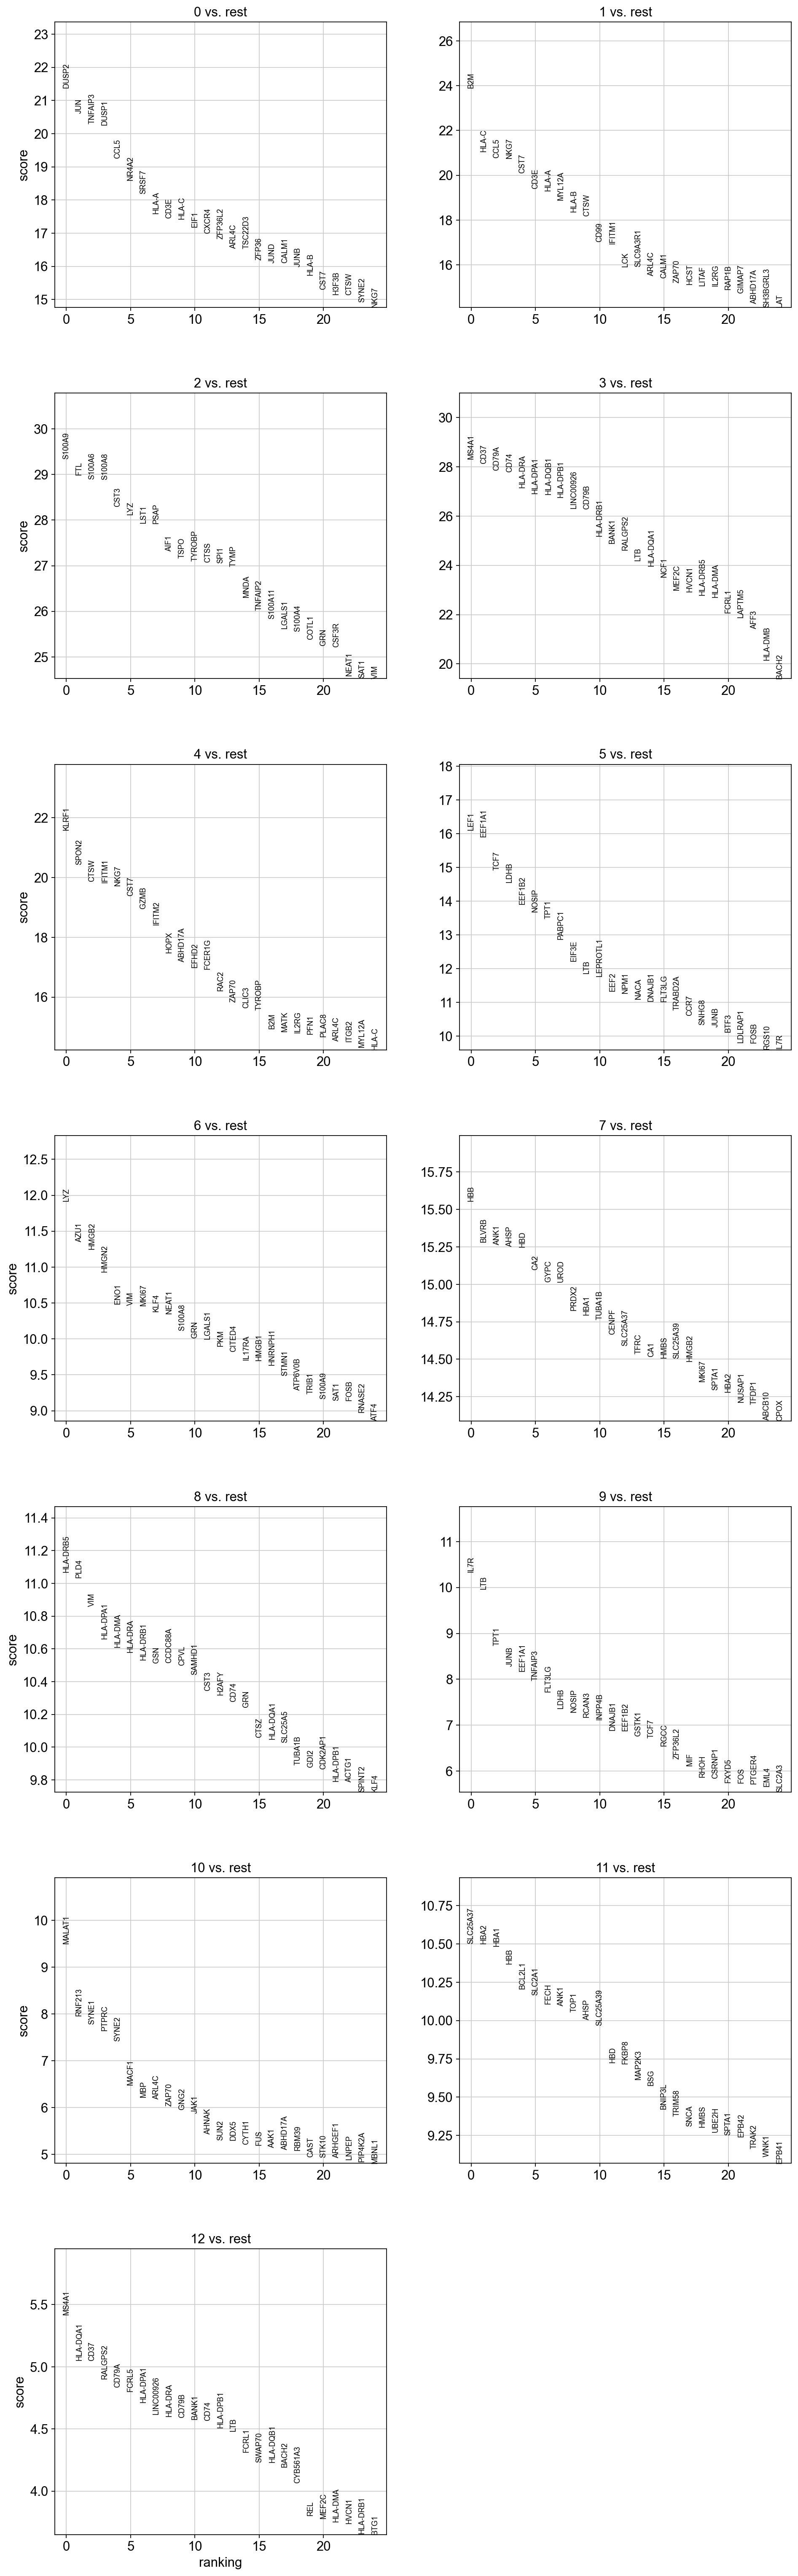

In [54]:
sc.pl.umap(eg, color=['leiden_1'], ncols =3)

sc.tl.rank_genes_groups(eg, 'leiden_1', method='wilcoxon')
sc.pl.rank_genes_groups(eg, n_genes=25, sharey=False, ncols=2)

- Cluster 4 corresponding NK cells? 

In [55]:
eg

AnnData object with n_obs × n_vars = 2188 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_1'
    uns: 'neighbors', 'new_cell_type_colors', 'umap', 'cell_type_colors', 'leiden', 'leiden_1_colors', 'leiden_r2_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distan

In [86]:
sample_nk = eg[eg.obs['leiden_1'] == "4"]


In [87]:
sample_nk

View of AnnData object with n_obs × n_vars = 223 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_1'
    uns: 'neighbors', 'new_cell_type_colors', 'umap', 'cell_type_colors', 'leiden', 'leiden_1_colors', 'leiden_r2_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 

In [88]:
#calculating neigbors for object containing only NK cells

sc.pp.neighbors(sample_nk, use_rep="X_totalVI")

sc.tl.umap(sample_nk)

In [93]:
#Calculating leidens for latent object
sc.tl.leiden(sample_nk, resolution = 0.6, key_added = "leiden_0_6")
sc.tl.leiden(sample_nk, resolution = 0.8, key_added = "leiden_0_8")
sc.tl.leiden(sample_nk, resolution = 1, key_added = "leiden_1")
sc.tl.leiden(sample_nk, resolution = 1.2, key_added = "leiden_1_2")

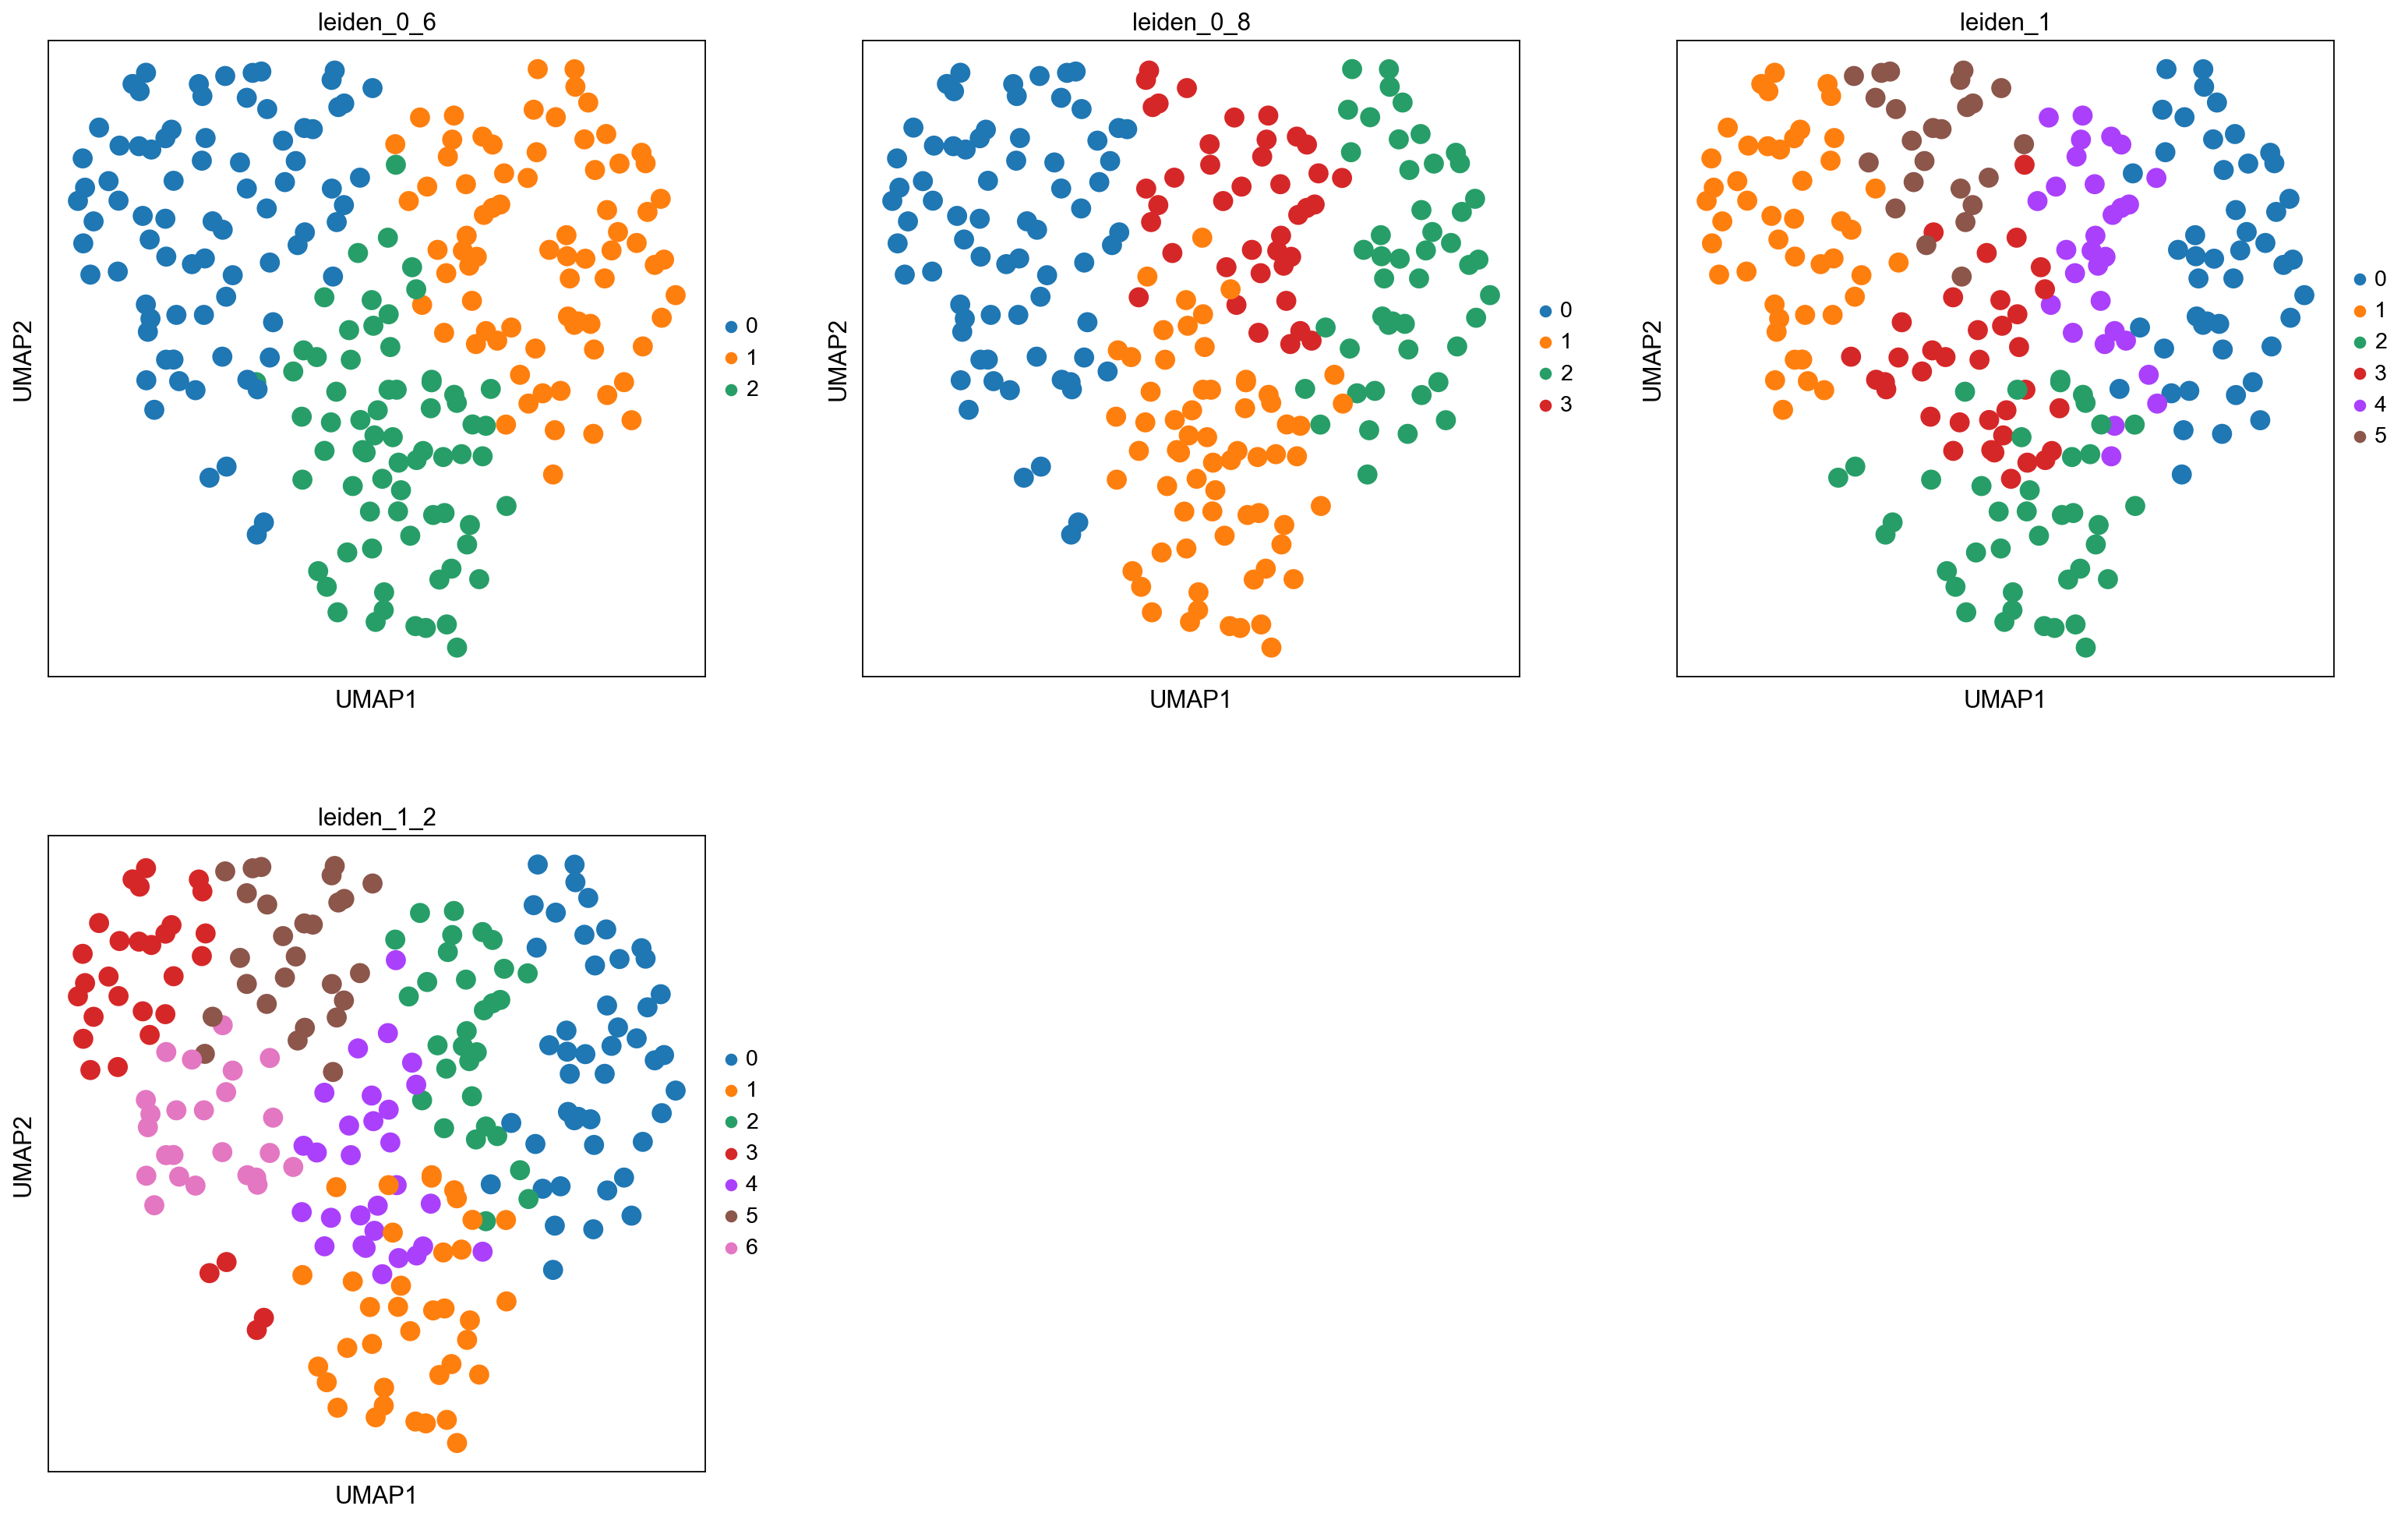

In [94]:
sc.pl.umap(sample_nk, color=['leiden_0_6', 'leiden_0_8', 'leiden_1', 'leiden_1_2'], ncols =3)

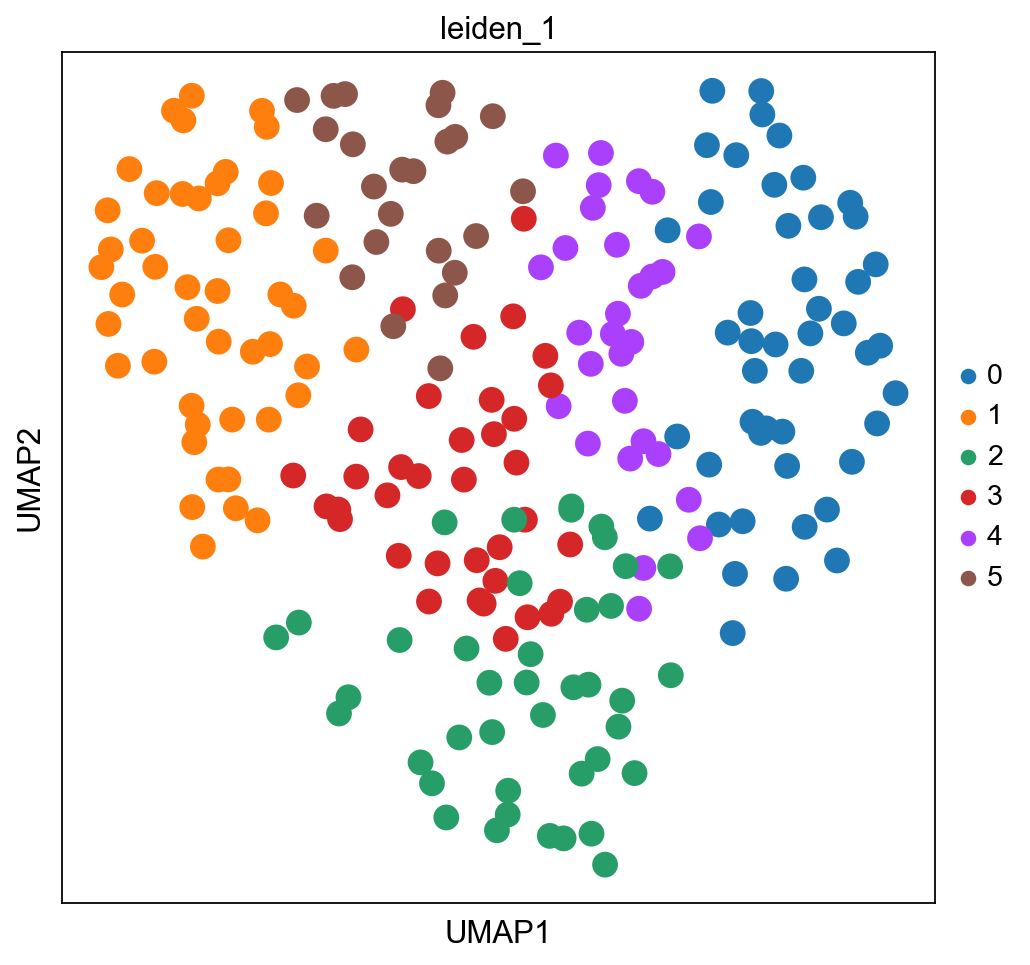

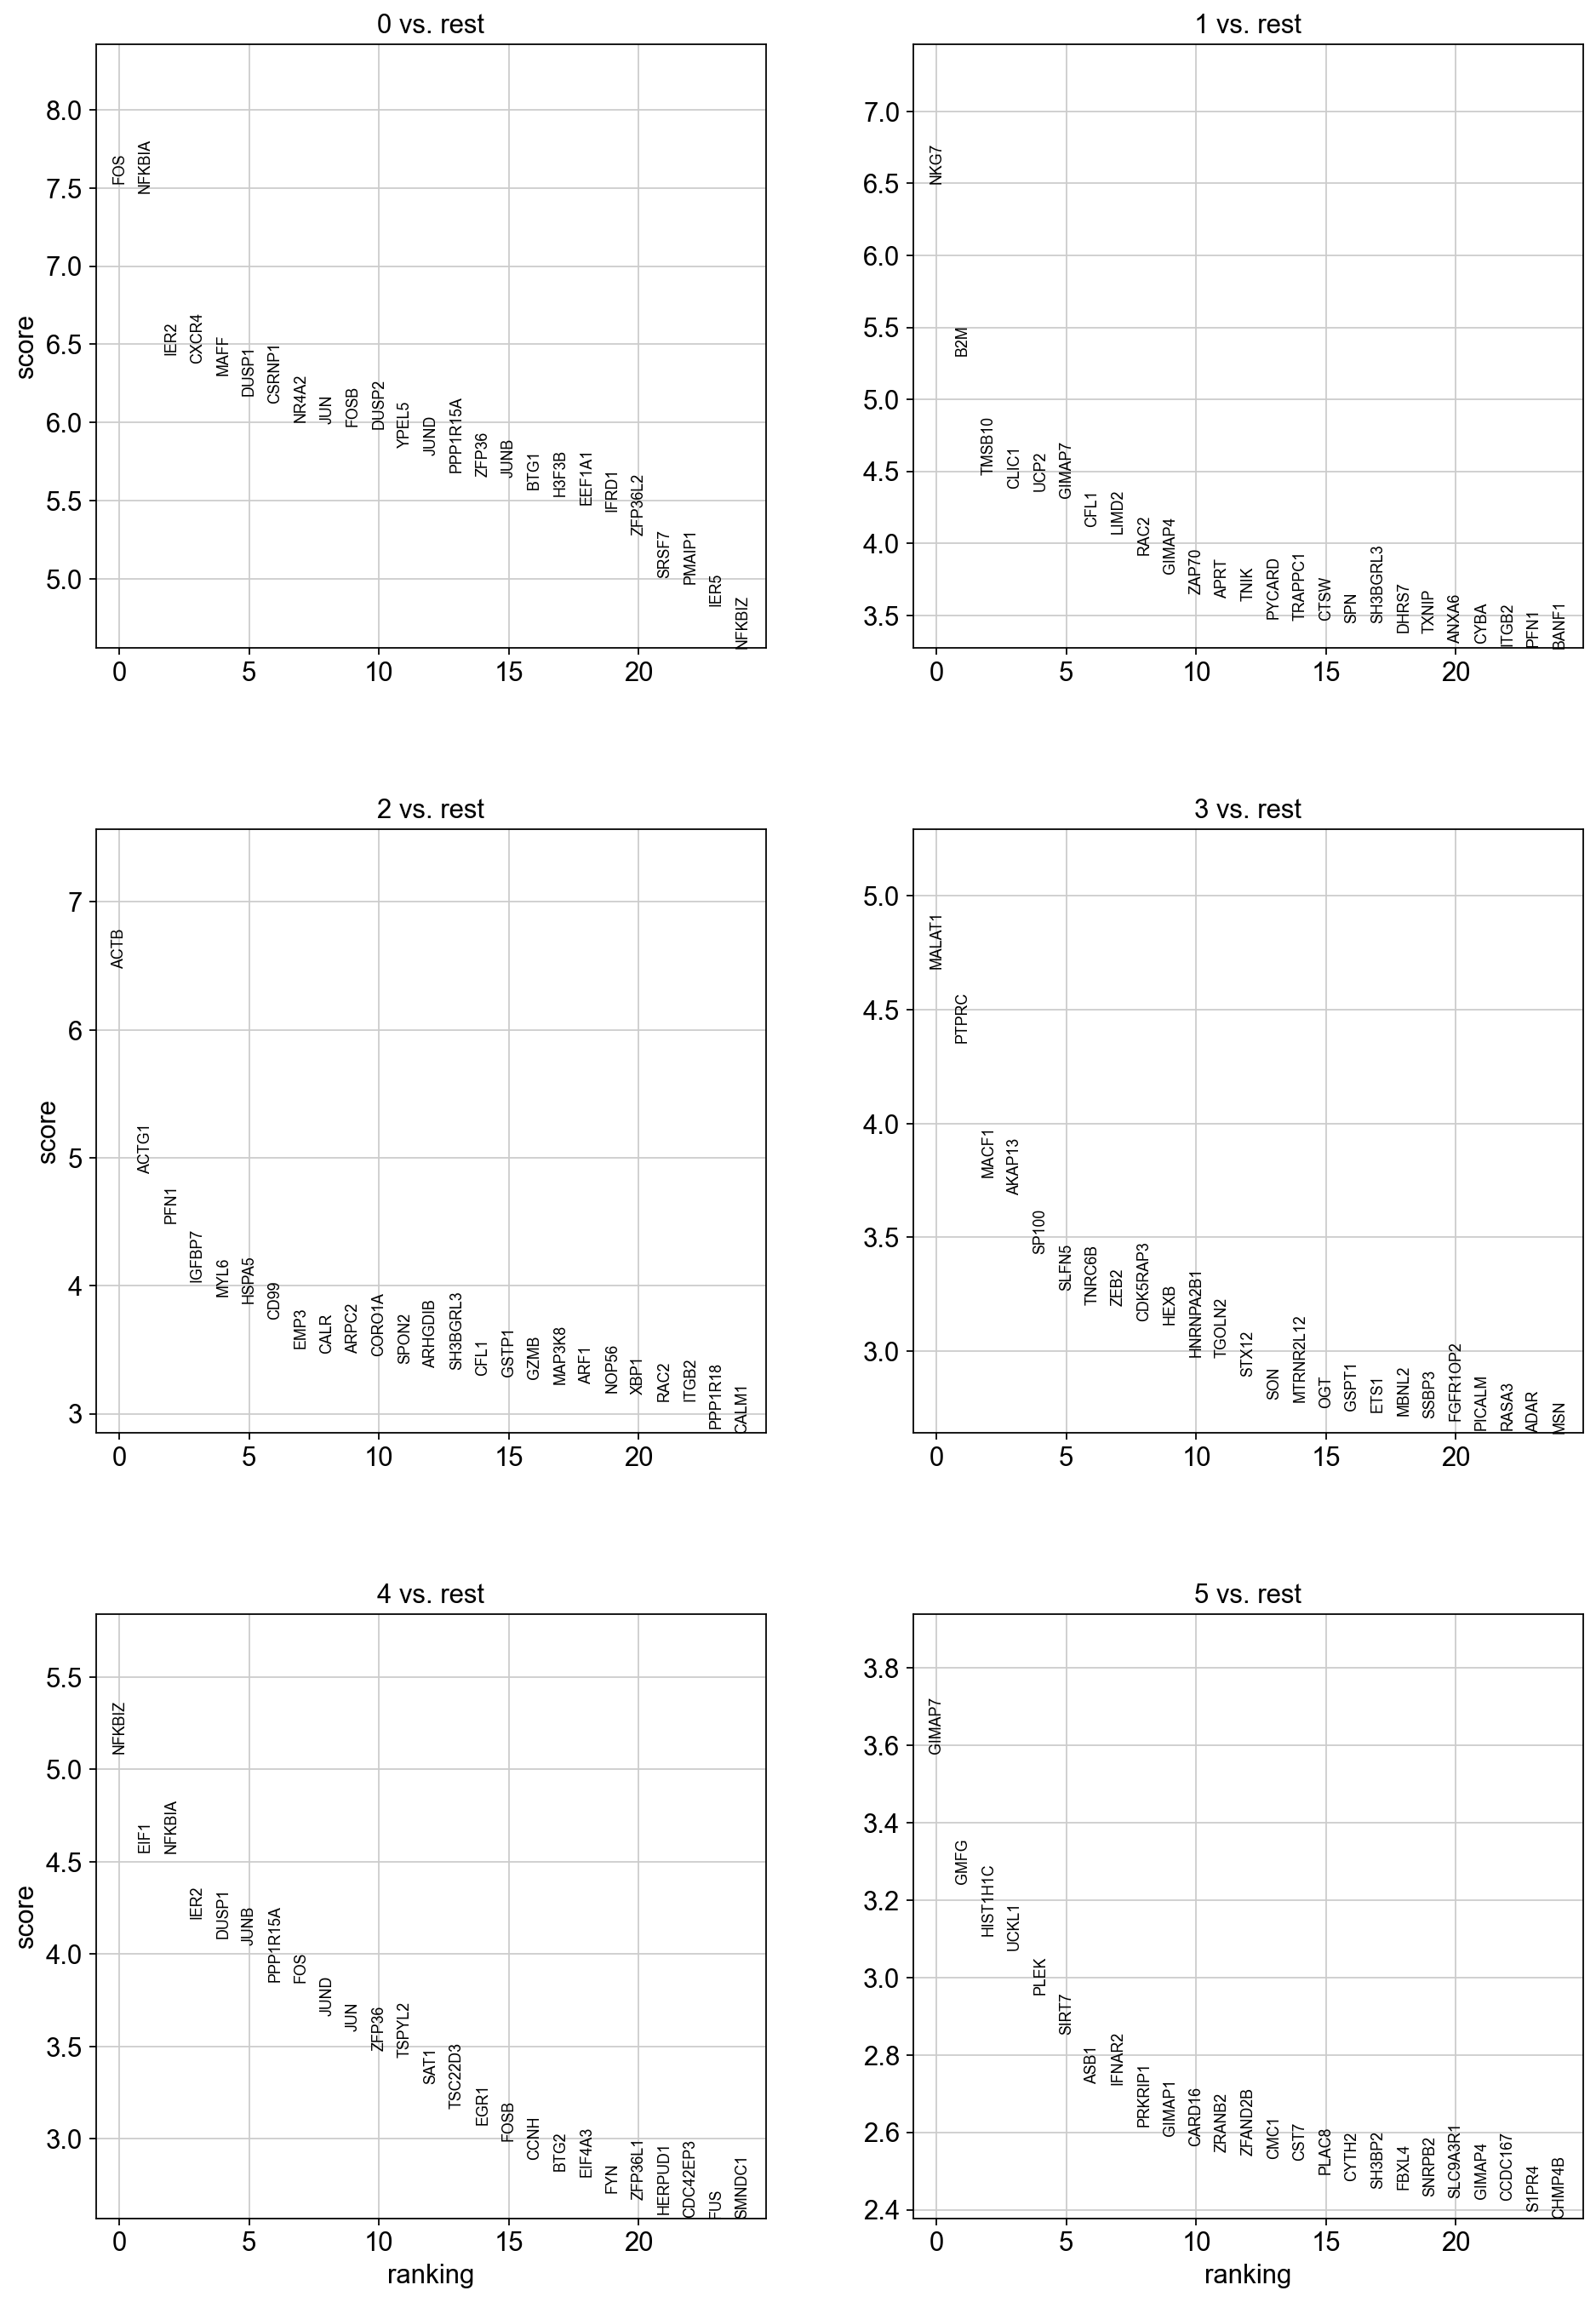

In [98]:
sc.pl.umap(sample_nk, color=['leiden_1'], ncols =3)

sc.tl.rank_genes_groups(sample_nk, 'leiden_1', method='wilcoxon')
sc.pl.rank_genes_groups(sample_nk, n_genes=25, sharey=False, ncols=2)

In [96]:
sample_nk

AnnData object with n_obs × n_vars = 223 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_1', 'leiden_0_4', 'leiden_0_6', 'leiden_0_75', 'leiden_0_8', 'leiden_1_2'
    uns: 'neighbors', 'new_cell_type_colors', 'umap', 'cell_type_colors', 'leiden', 'leiden_1_colors', 'leiden_r2_colors', 'rank_genes_groups', 'leiden_0_4_colors', 'leiden_0_6_colors', 'leiden_0_75_colors', 'leiden_0_8_col

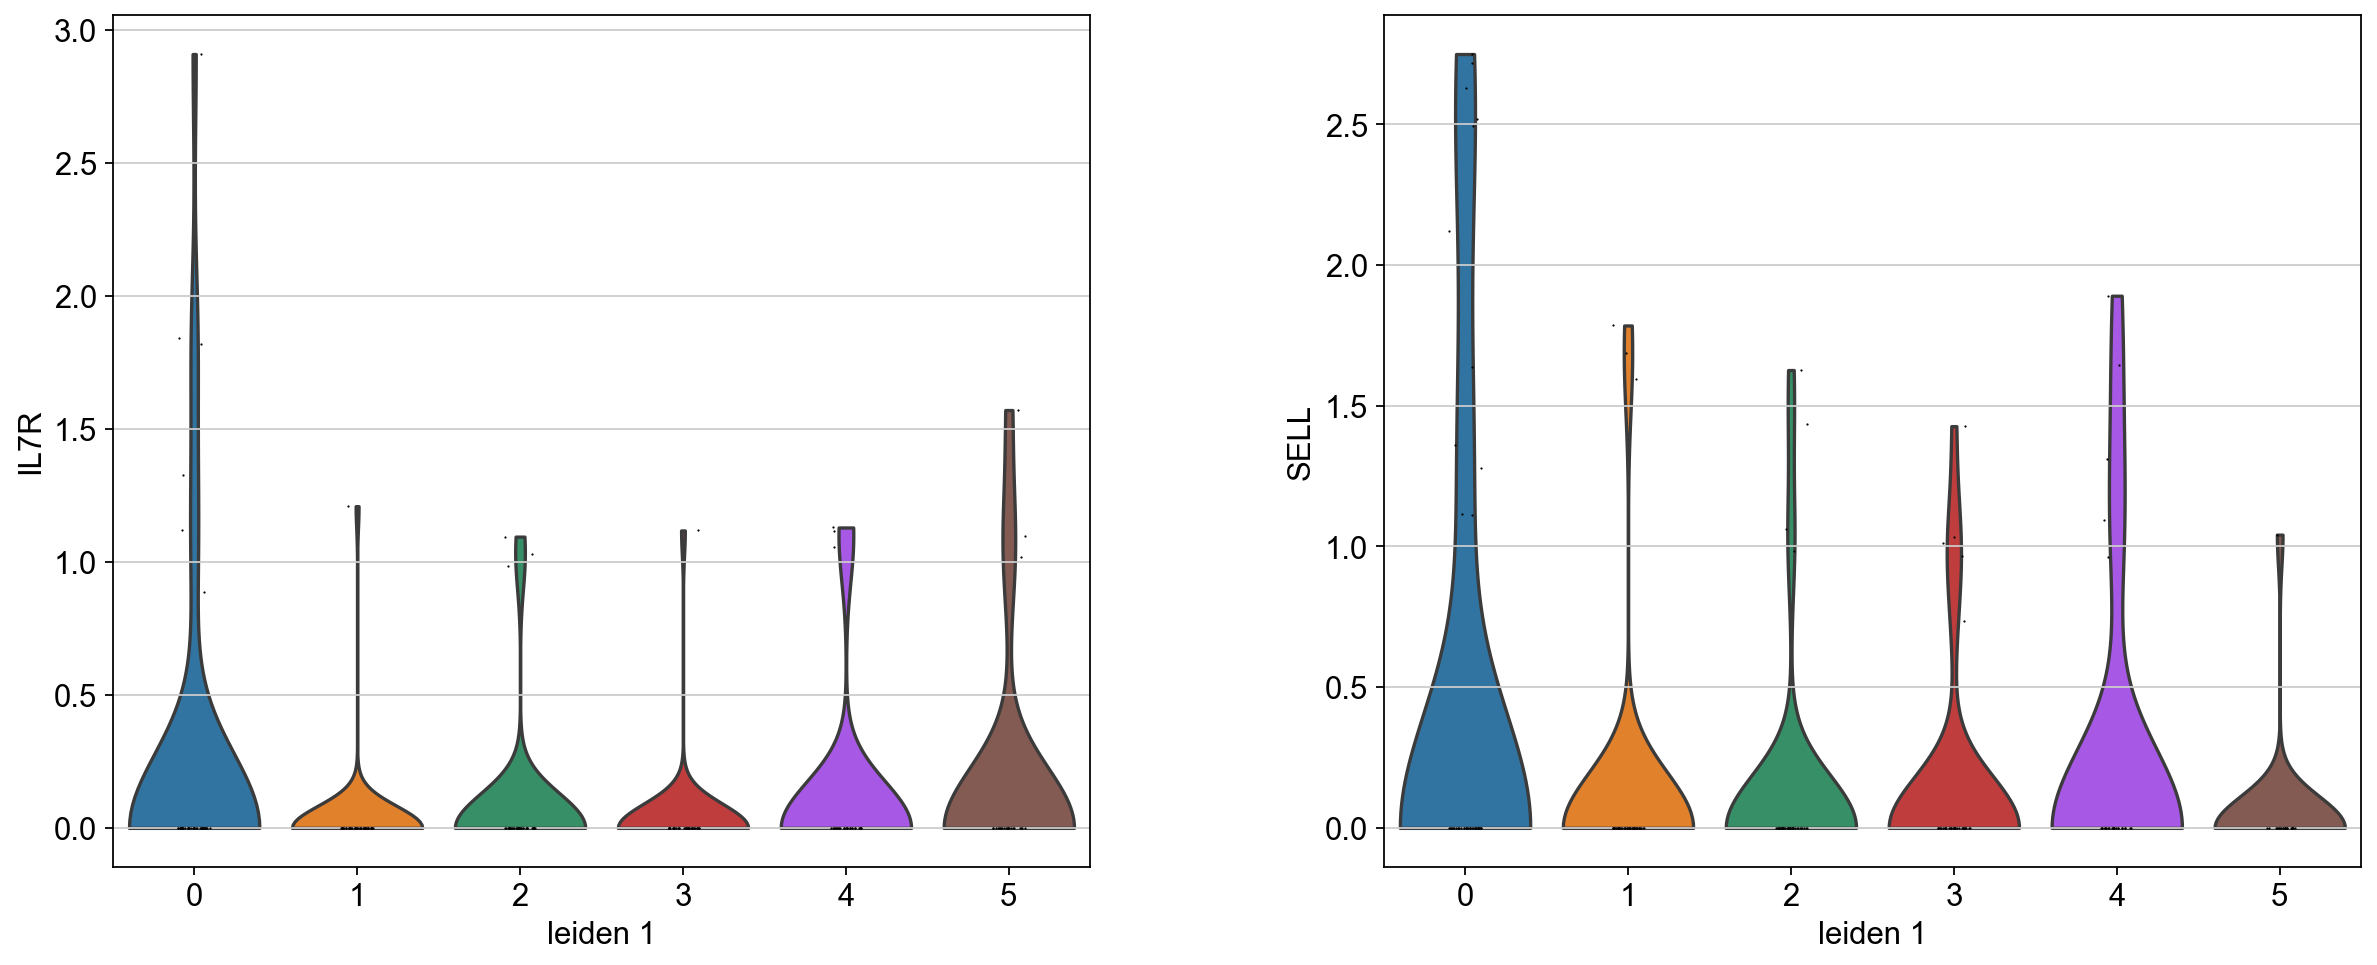

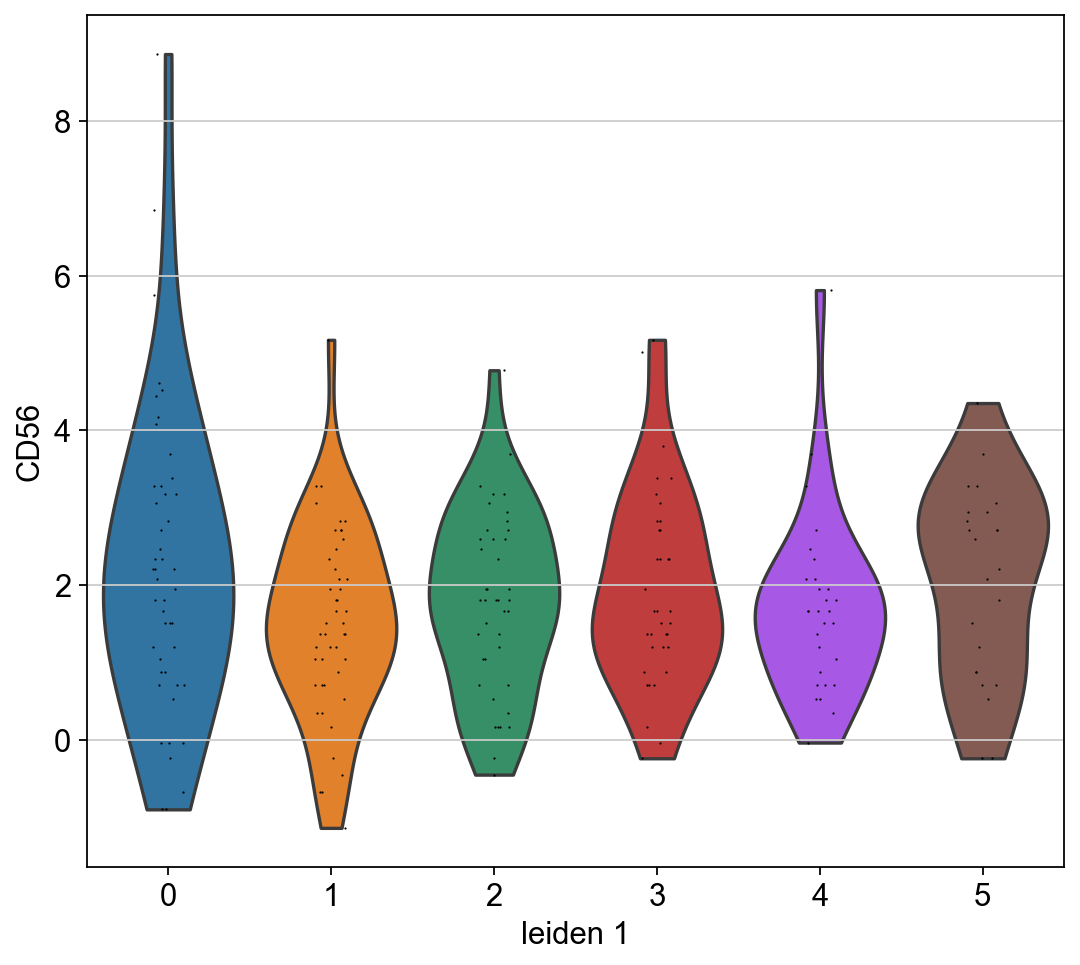

In [99]:
sc.pl.violin(sample_nk, ['IL7R', 'SELL'], groupby='leiden_1')

sc.pl.violin(sample_nk, ['CD56'], groupby='leiden_1')

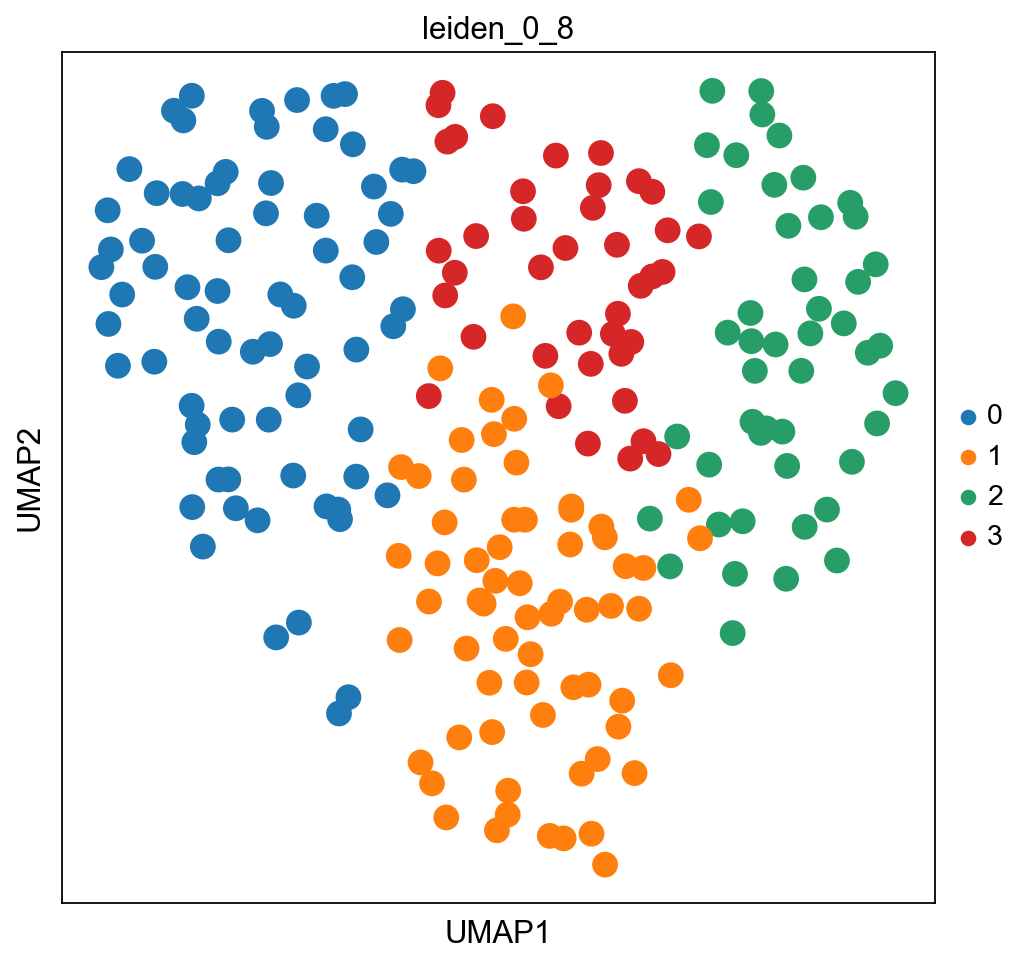

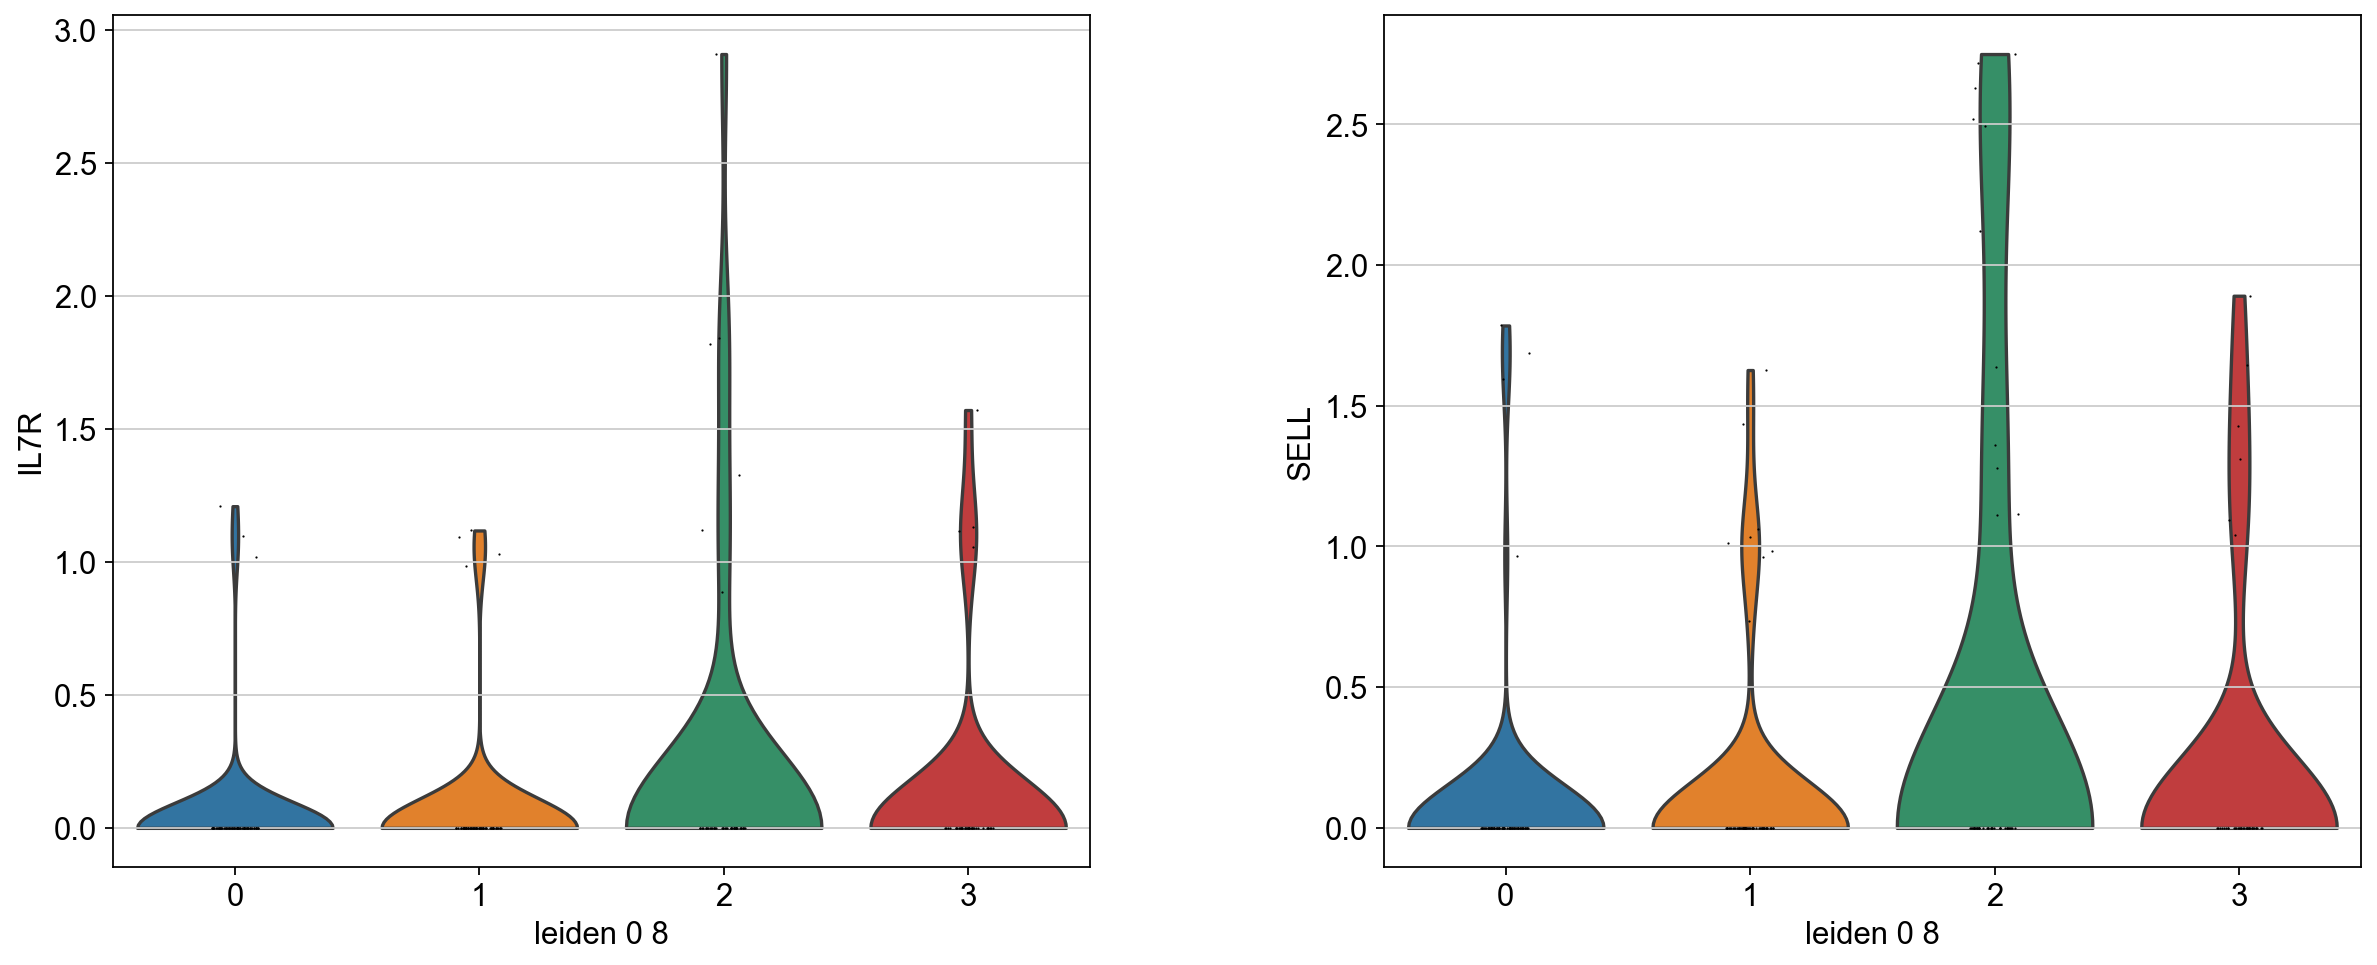

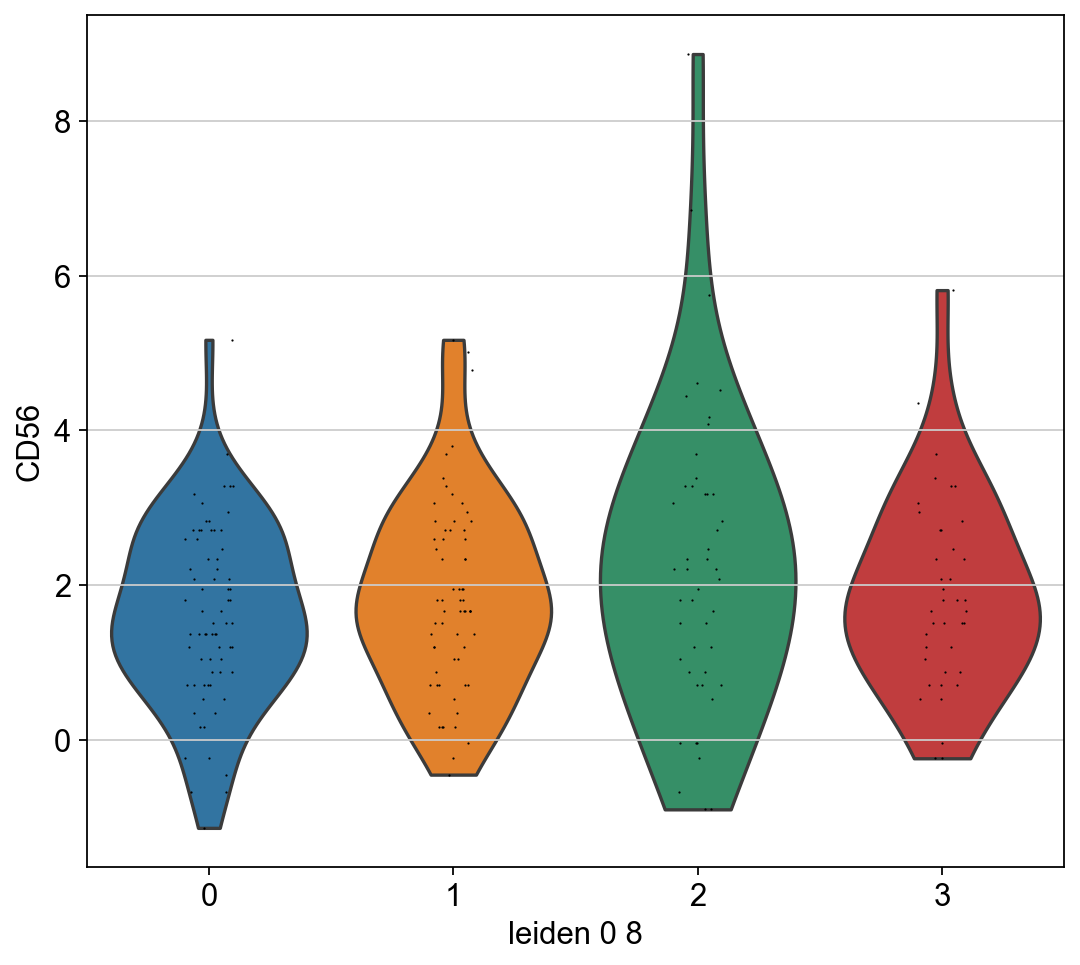

In [101]:
sc.pl.umap(sample_nk, color=['leiden_0_8'], ncols =3)

sc.pl.violin(sample_nk, ['IL7R', 'SELL'], groupby='leiden_0_8')

sc.pl.violin(sample_nk, ['CD56'], groupby='leiden_0_8')